In [2]:
import os

train_good_dir = "photos/toothbrush/train/good"
ground_truth_dir = "photos/toothbrush/ground_truth/defective"

print("Pliki w folderze 'train/good':")
print(os.listdir(train_good_dir))

print("Pliki w folderze 'ground_truth/defective':")
print(os.listdir(ground_truth_dir))


Pliki w folderze 'train/good':
['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png']
Pliki w folderze 'ground_truth/defective':
['000_mask.png', '001_mask.png', '002_mask.png', '003_mask.png', '004_mask.png', '005_mask.png', '006_mask.png', '007_mask.png', '008_mask.png', '009_mask.png', '010_mask.png', '011_mask.png', '012_mask.png', '013_mask.png', '014_mask.png', '015_mask.png', '016_mas

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def load_images_and_masks(image_dir, mask_dir, img_size=(256, 256)):
    images = []
    masks = []
    
    # Wczytanie wszystkich obrazów
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            # Usuń rozszerzenie i dodaj _mask do nazwy pliku
            mask_filename = filename.replace('.png', '_mask.png')
            img_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, mask_filename)
            
            # Sprawdzenie, czy plik maski istnieje
            if not os.path.exists(mask_path):
                print(f"Brak odpowiadającej maski dla: {filename}")
                continue  # Pomijamy obrazy bez masek
            
            # Wczytanie obrazu
            img = cv2.imread(img_path)
            if img is None:
                print(f"Błąd wczytywania obrazu: {img_path}")
                continue
            img = cv2.resize(img, img_size)
            images.append(img)
            
            # Wczytanie maski
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Błąd wczytywania maski: {mask_path}")
                continue
            mask = cv2.resize(mask, img_size)
            mask = np.expand_dims(mask, axis=-1)  # Dodanie wymiaru kanału
            masks.append(mask)
    
    return np.array(images), np.array(masks)



# Ścieżki do folderów
train_good_dir = "photos/toothbrush/train/good"
test_defective_dir = "photos/toothbrush/test/defective"
ground_truth_dir = "photos/toothbrush/ground_truth/defective"

# Wczytanie obrazów i masek
train_images, train_masks = load_images_and_masks(train_good_dir, ground_truth_dir)
test_images, test_masks = load_images_and_masks(test_defective_dir, ground_truth_dir)

# Normalizacja obrazów (skala 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Podział na zbiór walidacyjny
X_train, X_val, y_train, y_val = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)


Brak odpowiadającej maski dla: 030.png
Brak odpowiadającej maski dla: 031.png
Brak odpowiadającej maski dla: 032.png
Brak odpowiadającej maski dla: 033.png
Brak odpowiadającej maski dla: 034.png
Brak odpowiadającej maski dla: 035.png
Brak odpowiadającej maski dla: 036.png
Brak odpowiadającej maski dla: 037.png
Brak odpowiadającej maski dla: 038.png
Brak odpowiadającej maski dla: 039.png
Brak odpowiadającej maski dla: 040.png
Brak odpowiadającej maski dla: 041.png
Brak odpowiadającej maski dla: 042.png
Brak odpowiadającej maski dla: 043.png
Brak odpowiadającej maski dla: 044.png
Brak odpowiadającej maski dla: 045.png
Brak odpowiadającej maski dla: 046.png
Brak odpowiadającej maski dla: 047.png
Brak odpowiadającej maski dla: 048.png
Brak odpowiadającej maski dla: 049.png
Brak odpowiadającej maski dla: 050.png
Brak odpowiadającej maski dla: 051.png
Brak odpowiadającej maski dla: 052.png
Brak odpowiadającej maski dla: 053.png
Brak odpowiadającej maski dla: 054.png
Brak odpowiadającej maski

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder (Contracting Path)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Expansive Path)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Augmentacja danych
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# U-Net model
model = unet(input_size=(256, 256, 3))

# Model Checkpoint do zapisywania najlepszego modelu
checkpoint = ModelCheckpoint('unet_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Trenowanie modelu
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    steps_per_epoch=len(X_train) // 16,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint])


Epoch 1/50


KeyboardInterrupt: 

In [ ]:
# Załadowanie najlepszego modelu
model.load_weights('unet_model.h5')

# Predykcja na testowych danych
predictions = model.predict(test_images)

# Zapisz wyniki predykcji (np. jako obrazy)
for i, pred in enumerate(predictions):
    pred_image = (pred.squeeze() > 0.5).astype(np.uint8) * 255
    cv2.imwrite(f'predicted_mask_{i}.png', pred_image)


In [ ]:
### PYTORCH VERSION ###

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import cv2
import os

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()
        
        # Encoder (Contracting Path)
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.middle = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.decoder = nn.Sequential(
            # Upsample to 128x128
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            # Upsample to 256x256
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, out_channels, kernel_size=3, padding=1)
        )
        
    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.middle(x1)
        x3 = self.decoder(x2)
        return x3

# Test model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example input (3 channels, 256x256 image)
sample_input = torch.randn(1, 3, 256, 256).to(device)  # Batch size of 1
model = UNet(in_channels=3, out_channels=1).to(device)
output = model(sample_input)
print(f"Output size: {output.shape}")  # Expected output size: (1, 1, 256, 256)


Output size: torch.Size([1, 1, 256, 256])


In [21]:
class ToothbrushDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
        self.valid_indices = []  # Lista indeksów dla obrazów, które mają maski

        # Wstępna walidacja danych
        for idx, img_name in enumerate(self.images):
            mask_name = img_name.replace('.png', '_mask.png')
            mask_path = os.path.join(self.mask_dir, mask_name)
            if os.path.exists(mask_path):
                self.valid_indices.append(idx)

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        valid_idx = self.valid_indices[idx]
        img_name = self.images[valid_idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_name = img_name.replace('.png', '_mask.png')
        mask_path = os.path.join(self.mask_dir, mask_name)
        
        # Wczytanie obrazu
        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize obrazu i maski
        image = cv2.resize(image, (256, 256))
        mask = cv2.resize(mask, (256, 256))
        
        # Normalizacja obrazów
        image = image / 255.0
        image = np.transpose(image, (2, 0, 1))  # Zmiana na format CxHxW
        mask = np.expand_dims(mask, axis=0)  # Maski mają tylko jeden kanał
        
        # Transformacje (jeśli są zdefiniowane)
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        
        return torch.tensor(image, dtype=torch.float32), torch.tensor(mask, dtype=torch.float32)


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Przygotowanie do użycia GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ładowanie danych
train_dataset = ToothbrushDataset(image_dir="photos/toothbrush/train/good", 
                                  mask_dir="photos/toothbrush/ground_truth/defective")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Tworzenie modelu
model = UNet(in_channels=3, out_channels=1).to(device)

# Definicja loss function i optymalizatora
criterion = nn.BCEWithLogitsLoss()  # Loss dla segmentacji binarnej
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Zmienna globalna do przechowywania najlepszej straty
best_loss = float('inf')

# Funkcja trenowania z zapisywaniem najlepszego modelu
def train_model(model, train_loader, criterion, optimizer, num_epochs=20, save_path="best_model.pth"):
    global best_loss  # Używamy globalnej zmiennej best_loss
    
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Pomijamy próbki, które są None (czyli błędne lub brakujące)
            if inputs is None or labels is None:
                continue  # Pomijamy próbki, które nie zostały poprawnie załadowane

            # Przenosimy dane na GPU
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zerowanie gradientów
            optimizer.zero_grad()
            
            # Przewidywanie
            outputs = model(inputs)
            
            # Obliczanie błędu
            loss = criterion(outputs, labels)
            loss.backward()  # Obliczanie gradientów
            
            # Aktualizacja wag
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")
        
        # Jeśli strata jest lepsza, zapisujemy model
        if avg_loss < best_loss:
            print(f"New best model found, saving to {save_path}")
            best_loss = avg_loss
            torch.save(model.state_dict(), save_path)  # Zapisz model

# Rozpoczęcie trenowania modelu
train_model(model, train_loader, criterion, optimizer)


Epoch 1/20, Loss: 0.37806811928749084
New best model found, saving to best_model.pth
Epoch 2/20, Loss: 0.2459566369652748
New best model found, saving to best_model.pth
Epoch 3/20, Loss: -0.7006696127355099
New best model found, saving to best_model.pth
Epoch 4/20, Loss: -4.393049478530884
New best model found, saving to best_model.pth
Epoch 5/20, Loss: -26.73586082458496
New best model found, saving to best_model.pth
Epoch 6/20, Loss: -85.87925720214844
New best model found, saving to best_model.pth
Epoch 7/20, Loss: -255.9389190673828
New best model found, saving to best_model.pth
Epoch 8/20, Loss: -1016.2275238037109
New best model found, saving to best_model.pth
Epoch 9/20, Loss: -1829.5035400390625
New best model found, saving to best_model.pth
Epoch 10/20, Loss: -5581.8453369140625
New best model found, saving to best_model.pth
Epoch 11/20, Loss: -12427.982421875
New best model found, saving to best_model.pth
Epoch 12/20, Loss: -28523.162109375
New best model found, saving to bes

C:\Users\Piotrek\AppData\Local\Temp\ipykernel_25756\486523835.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))  # Zała

Output shape: (256, 256)


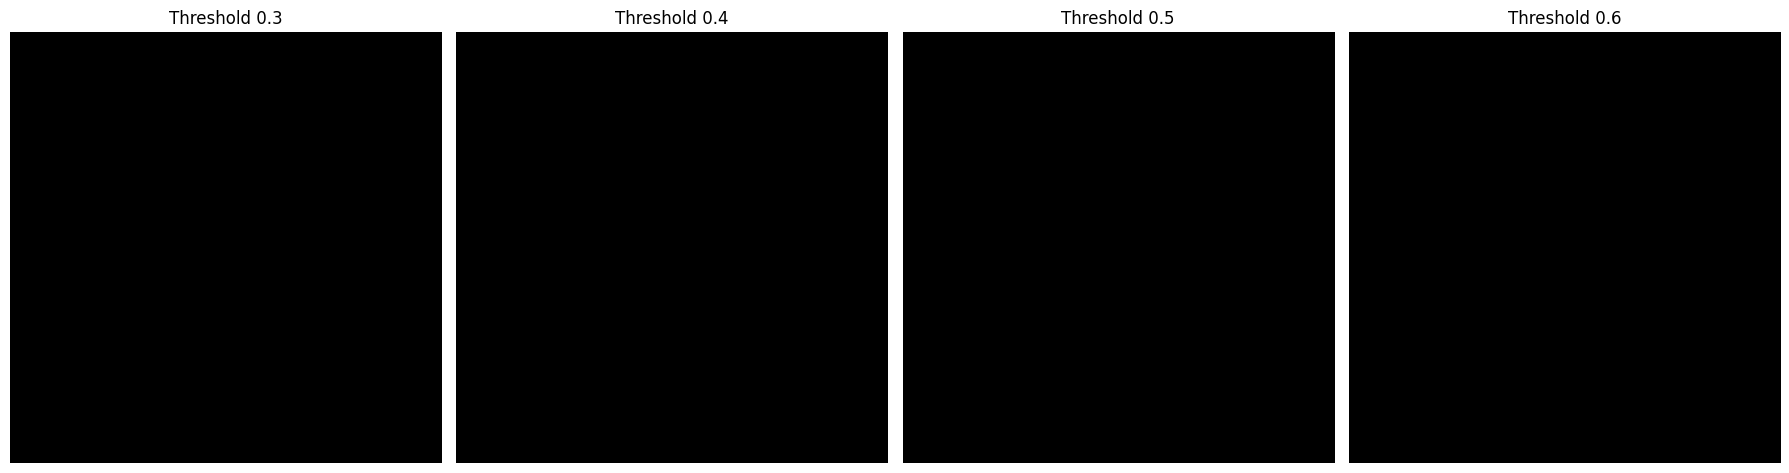

Precision: 0.023
Recall: 1.000


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Załadowanie najlepszego modelu
model.load_state_dict(torch.load("best_model.pth"))  # Załaduj model z pliku
model.to(device)
model.eval()

# Ścieżka do testowego obrazu
image_path = 'photos/toothbrush/test/defective/000.png'

# Wczytaj obraz
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Nie udało się wczytać obrazu z {image_path}. Sprawdź ścieżkę!")

# Zmiana rozmiaru obrazu na 256x256
image_resized = cv2.resize(image, (256, 256))

# Normalizacja obrazu
image_resized = image_resized / 255.0
image_resized = np.transpose(image_resized, (2, 0, 1))  # CxHxW
image_resized = torch.tensor(image_resized, dtype=torch.float32).unsqueeze(0).to(device)

# Predykcja na obrazie
with torch.no_grad():
    output = model(image_resized)

# Zmieniamy wyjście modelu na zakres [0, 1] przy różnych progach
output_prob = torch.sigmoid(output).squeeze().cpu().numpy()
print(f"Output shape: {output_prob.shape}")  # Sprawdzenie kształtu wyjścia

# Spróbujmy różnych progów, aby zobaczyć, jak model reaguje
thresholds = [0.3, 0.4, 0.5, 0.6]  # Przykładowe progi
best_threshold = 0.5  # Możesz dostosować ten próg ręcznie

# Wizualizacja dla różnych progów
fig, axes = plt.subplots(1, len(thresholds), figsize=(18, 6))
for i, threshold in enumerate(thresholds):
    predicted_mask = (output_prob > threshold).astype(int)
    
    # Wizualizacja
    axes[i].imshow(predicted_mask, cmap='gray')
    axes[i].set_title(f"Threshold {threshold}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Sprawdzenie dokładności przy najlepszym progu (np. 0.5)
predicted_mask_best = (output_prob > best_threshold).astype(int)

# Wczytanie ground truth maski
gt_mask_path = 'photos/toothbrush/ground_truth/defective/000_mask.png'  # Ścieżka do maski
gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
gt_mask = cv2.resize(gt_mask, (256, 256))

# Obliczenie metryk (precision, recall)
predicted_mask_bin = predicted_mask_best
gt_mask_bin = (gt_mask > 127).astype(int)  # Ground truth mask in binary format

precision = precision_score(gt_mask_bin.flatten(), predicted_mask_bin.flatten())
recall = recall_score(gt_mask_bin.flatten(), predicted_mask_bin.flatten())

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

def load_and_preprocess(image_path):
    """Wczytanie i preprocessowanie obrazu"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Cannot load image: {image_path}")
    
    # Delikatne zwiększenie kontrastu
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Silniejsze rozmycie dla redukcji szumu
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    
    return img, blurred

def add_grid_overlay(image, grid_size=(10, 10), color=(0, 255, 0), thickness=2):
    """Dodanie siatki do obrazu w celu analizy regionów"""
    h, w, _ = image.shape
    cell_height = h // grid_size[0]
    cell_width = w // grid_size[1]

    # Rysowanie pionowych linii siatki
    for i in range(1, grid_size[1]):
        x = i * cell_width
        cv2.line(image, (x, 0), (x, h), color, thickness)

    # Rysowanie poziomych linii siatki
    for i in range(1, grid_size[0]):
        y = i * cell_height
        cv2.line(image, (0, y), (w, y), color, thickness)

    return image

def apply_edge_detection(image):
    """Zastosowanie detekcji krawędzi (Sobel/Canny)"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Użyj Sobela do detekcji krawędzi
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Wykrywanie krawędzi za pomocą Canny'ego
    canny_edges = cv2.Canny(gray, 100, 200)
    
    # Łączenie wyników Sobela i Canny'ego
    combined_edges = cv2.bitwise_or(sobel_x, sobel_y)
    
    return combined_edges, canny_edges

def detect_defects_advanced(ref_gray, defect_gray, ref_img, defect_img):
    """Zaawansowana detekcja defektów z wieloma metodami"""
    
    # 1. Maska obszaru szczoteczki
    toothbrush_mask = create_toothbrush_mask(defect_gray)
    
    # 2. Detekcja różnic intensywności z wysokim progiem
    diff = cv2.absdiff(ref_gray, defect_gray)
    diff = cv2.GaussianBlur(diff, (5, 5), 0)
    
    # ZNACZNIE wyższy próg - tylko wyraźne różnice
    mean_diff = np.mean(diff[toothbrush_mask > 0])
    std_diff = np.std(diff[toothbrush_mask > 0])
    threshold = mean_diff + 4 * std_diff  # Zwiększone z 2 do 4
    
    _, intensity_mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
    # 3. Detekcja różnic kolorystycznych w przestrzeni LAB
    lab_ref = cv2.cvtColor(ref_img, cv2.COLOR_BGR2LAB)
    lab_defect = cv2.cvtColor(defect_img, cv2.COLOR_BGR2LAB)
    
    # Różnice w kanałach a* i b* (kolory)
    a_diff = cv2.absdiff(lab_ref[:,:,1], lab_defect[:,:,1])
    b_diff = cv2.absdiff(lab_ref[:,:,2], lab_defect[:,:,2])
    
    # Kombinacja różnic kolorystycznych
    color_diff = np.maximum(a_diff, b_diff)
    color_diff = cv2.GaussianBlur(color_diff, (5, 5), 0)
    
    # Wysoki próg dla kolorów
    mean_color = np.mean(color_diff[toothbrush_mask > 0])
    std_color = np.std(color_diff[toothbrush_mask > 0])
    color_threshold = mean_color + 3 * std_color
    
    _, color_mask = cv2.threshold(color_diff, color_threshold, 255, cv2.THRESH_BINARY)
    
    # 4. Detekcja lokalnych anomalii (blob detection)
    # Wykorzystanie różnicy po rozmyciu do znajdowania lokalnych zmian
    ref_blur_heavy = cv2.GaussianBlur(ref_gray, (31, 31), 0)
    defect_blur_heavy = cv2.GaussianBlur(defect_gray, (31, 31), 0)
    
    local_diff = cv2.absdiff(ref_blur_heavy, defect_blur_heavy)
    mean_local = np.mean(local_diff[toothbrush_mask > 0])
    std_local = np.std(local_diff[toothbrush_mask > 0])
    local_threshold = mean_local + 3 * std_local
    
    _, local_mask = cv2.threshold(local_diff, local_threshold, 255, cv2.THRESH_BINARY)
    
    # 5. Kombinacja wszystkich masek
    combined_mask = cv2.bitwise_or(intensity_mask, color_mask)
    combined_mask = cv2.bitwise_or(combined_mask, local_mask)
    
    # Zastosowanie maski szczoteczki
    combined_mask = cv2.bitwise_and(combined_mask, toothbrush_mask)
    
    # 6. Agresywne czyszczenie - tylko duże, znaczące obszary
    kernel_clean = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    
    # Zamknięcie małych dziur
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel_clean)
    
    # Usunięcie małych obiektów
    combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel_clean)
    
    # 7. Filtracja konturów po wielkości
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_mask = np.zeros_like(combined_mask)
    
    min_area = 500  # ZNACZNIE zwiększony minimalny obszar
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            # Dodatkowo sprawdź aspect ratio i wypełnienie
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = w / h if h > 0 else 0
            if 0.2 < aspect_ratio < 5.0:
                cv2.fillPoly(filtered_mask, [cnt], 255)
    
    return filtered_mask

def calculate_metrics(pred_mask, gt_mask):
    """Obliczanie precision i recall"""
    gt_binary = (gt_mask > 127).astype(np.uint8)
    pred_binary = (pred_mask > 127).astype(np.uint8)
    
    gt_flat = gt_binary.flatten()
    pred_flat = pred_binary.flatten()
    
    if np.sum(gt_flat) == 0 and np.sum(pred_flat) == 0:
        return 1.0, 1.0  # Perfect match when both are empty
    elif np.sum(gt_flat) == 0:
        return 0.0, 1.0  # No true positives, but recall is undefined/perfect
    
    precision = precision_score(gt_flat, pred_flat, zero_division=0)
    recall = recall_score(gt_flat, pred_flat, zero_division=0)
    
    return precision, recall

def visualize_results(results):
    """Wizualizacja wyników analizy"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    axes[0, 0].imshow(cv2.cvtColor(results['reference'], cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Reference Image (Good)', fontsize=14, fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(results['defect'], cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Defective Image', fontsize=14, fontweight='bold')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(results['gt_mask'], cmap='gray')
    axes[0, 2].set_title('Ground Truth Mask', fontsize=14, fontweight='bold')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(results['detected_mask'], cmap='gray')
    axes[1, 0].set_title('Detected Defects Mask', fontsize=14, fontweight='bold')
    axes[1, 0].axis('off')
    
    comparison = np.zeros((*results['gt_mask'].shape, 3))
    comparison[:,:,1] = (results['gt_mask'] > 127).astype(float)  # GT w zieleni
    comparison[:,:,0] = (results['detected_mask'] > 127).astype(float)  # Detekcja w czerwieni
    axes[1, 1].imshow(comparison)
    axes[1, 1].set_title('Mask Comparison\n(Green=GT, Red=Detected, Yellow=Overlap)', 
                        fontsize=14, fontweight='bold')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(cv2.cvtColor(results['result'], cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title(f'Final Result\nPrecision: {results["metrics"][0]:.3f}, Recall: {results["metrics"][1]:.3f}', 
                        fontsize=14, fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nFinal Metrics:")
    print(f"Precision: {results['metrics'][0]:.3f}")
    print(f"Recall: {results['metrics'][1]:.3f}")
    print(f"F1-Score: {2 * (results['metrics'][0] * results['metrics'][1]) / (results['metrics'][0] + results['metrics'][1]):.3f}")

def analyze_toothbrush_sample(dataset_path, sample_index=0):
    """Analiza próbki szczoteczki z poprawioną detekcją"""
    
    train_good = sorted([os.path.join(dataset_path, "train/good", f)
                         for f in os.listdir(os.path.join(dataset_path, "train/good")) if f.endswith('.png')])
    test_defect = sorted([os.path.join(dataset_path, "test/defective", f)
                          for f in os.listdir(os.path.join(dataset_path, "test/defective")) if f.endswith('.png')])
    gt_masks = sorted([os.path.join(dataset_path, "ground_truth/defective", f)
                       for f in os.listdir(os.path.join(dataset_path, "ground_truth/defective")) if f.endswith('.png')])
    
    ref_img_path = train_good[sample_index % len(train_good)]
    defect_img_path = test_defect[sample_index % len(test_defect)]
    gt_mask_path = gt_masks[sample_index % len(gt_masks)]
    
    ref_img, ref_gray = load_and_preprocess(ref_img_path)
    defect_img, defect_gray = load_and_preprocess(defect_img_path)
    gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
    
    if gt_mask.shape != defect_img.shape[:2]:
        gt_mask = cv2.resize(gt_mask, (defect_img.shape[1], defect_img.shape[0]))
    
    detected_mask = detect_defects_advanced(ref_gray, defect_gray, ref_img, defect_img)
    precision, recall = calculate_metrics(detected_mask, gt_mask)
    
    result = defect_img.copy()
    
    contours, _ = cv2.findContours(detected_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 3)
            cv2.putText(result, 'D', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    gt_contours, _ = cv2.findContours(gt_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(result, gt_contours, -1, (0, 255, 0), 3)
    
    cv2.putText(result, f"Precision: {precision:.3f}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.putText(result, f"Recall: {recall:.3f}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    return {
        'result': result,
        'reference': ref_img,
        'defect': defect_img,
        'gt_mask': gt_mask,
        'detected_mask': detected_mask,
        'metrics': (precision, recall)
    }

def batch_analysis(dataset_path, num_samples=5):
    """Analiza wielu próbek do oceny ogólnej wydajności"""
    all_precisions = []
    all_recalls = []
    
    print("Starting batch analysis...")
    
    for i in range(num_samples):
        try:
            print(f"\n--- Sample {i+1}/{num_samples} ---")
            results = analyze_toothbrush_sample(dataset_path, sample_index=i)
            precision, recall = results['metrics']
            
            all_precisions.append(precision)
            all_recalls.append(recall)
            
            print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")
            
        except Exception as e:
            print(f"Error processing sample {i}: {e}")
            continue
    
    if all_precisions:
        avg_precision = np.mean(all_precisions)
        avg_recall = np.mean(all_recalls)
        avg_f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall) if (avg_precision + avg_recall) > 0 else 0
        
        print(f"\n=== BATCH RESULTS ===")
        print(f"Average Precision: {avg_precision:.3f} (±{np.std(all_precisions):.3f})")
        print(f"Average Recall: {avg_recall:.3f} (±{np.std(all_recalls):.3f})")
        print(f"Average F1-Score: {avg_f1:.3f}")
        print(f"Samples processed: {len(all_precisions)}")
    
    return all_precisions, all_recalls

# Przykład użycia
if __name__ == "__main__":
    dataset_path = "photos/toothbrush"
    
    # Analiza pojedynczej próbki
    print("=== SINGLE SAMPLE ANALYSIS ===")
    results = analyze_toothbrush_sample(dataset_path, sample_index=0)
    visualize_results(results)
    
    # Analiza wsadowa (opcjonalna)
    print("\n=== BATCH ANALYSIS ===")
    batch_analysis(dataset_path, num_samples=3)


=== SINGLE SAMPLE ANALYSIS ===


NameError: name 'create_toothbrush_mask' is not defined

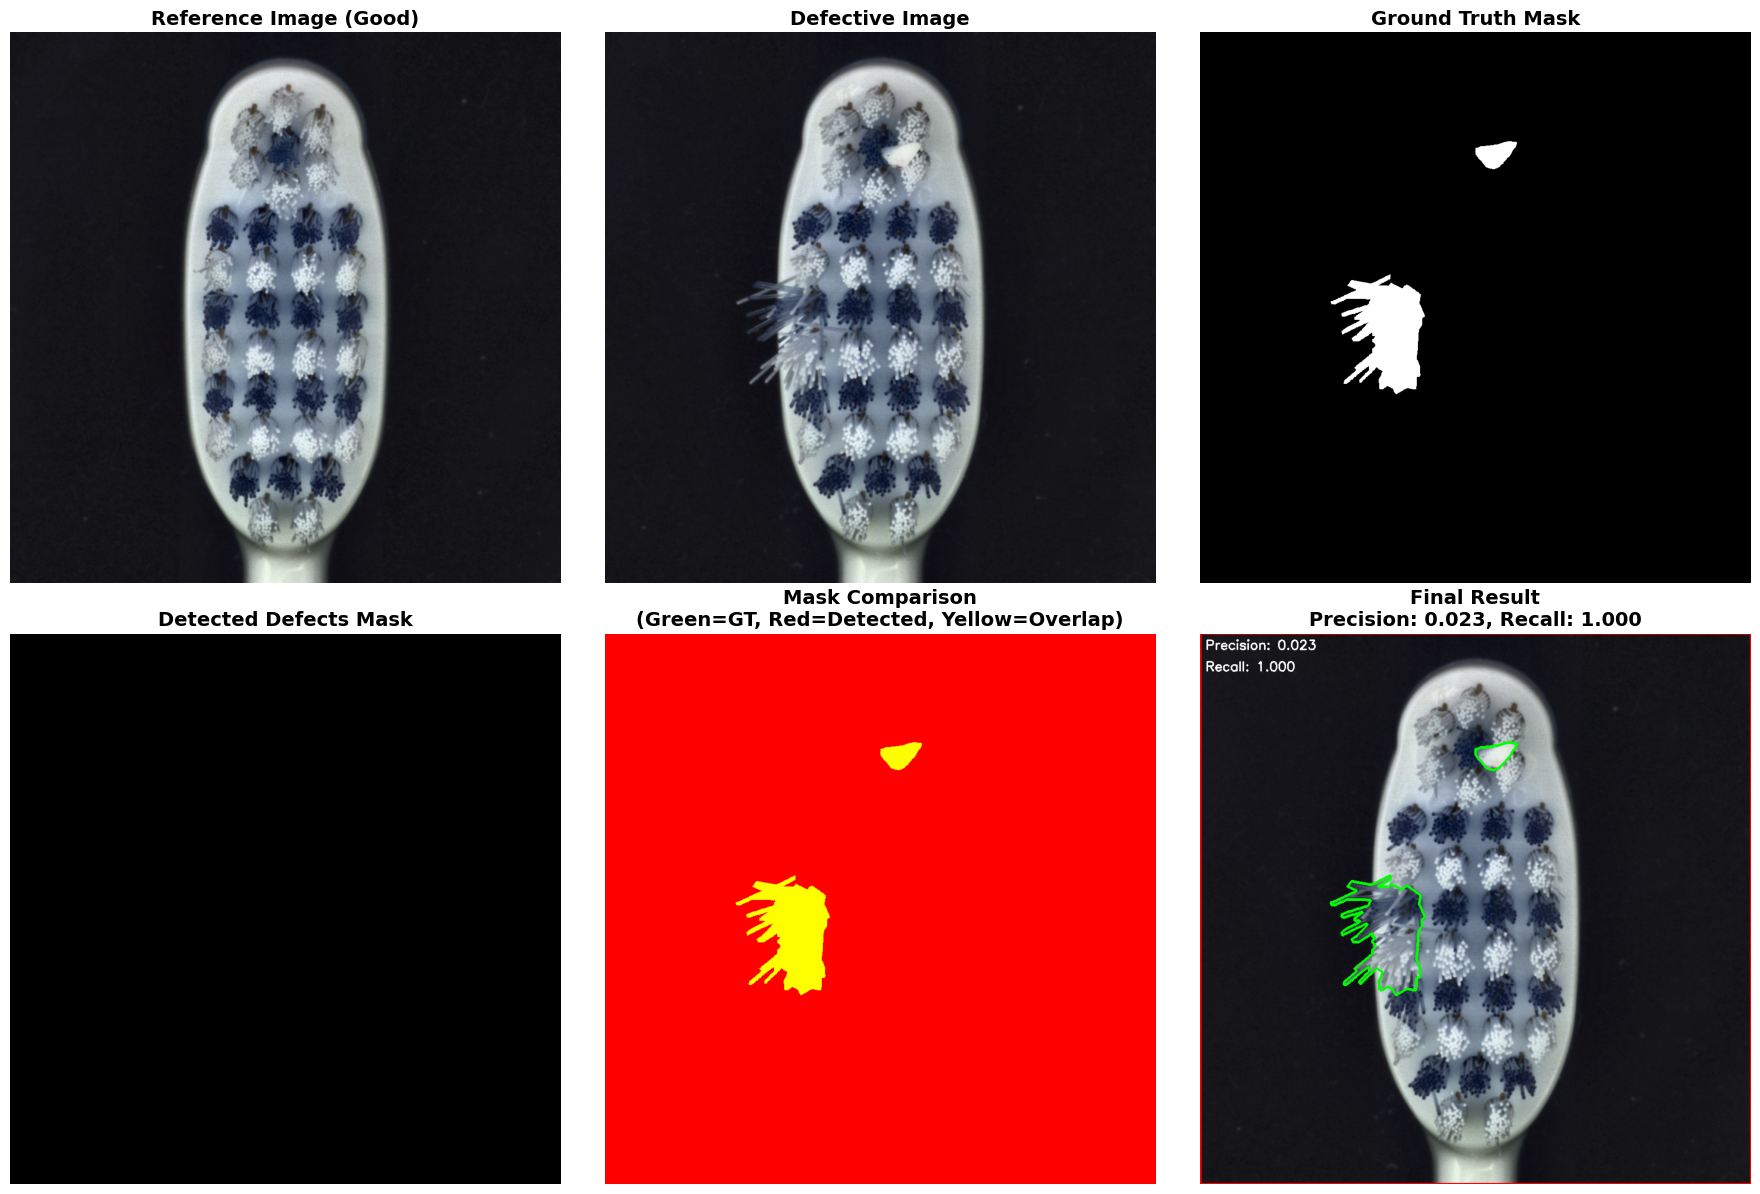


Final Metrics:
Precision: 0.023
Recall: 1.000
F1-Score: 0.044


In [38]:
import cv2
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

def load_and_preprocess(image_path):
    """Wczytanie i preprocessowanie obrazu"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Cannot load image: {image_path}")
    
    # Delikatne zwiększenie kontrastu
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Silniejsze rozmycie dla redukcji szumu
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    
    return img, blurred

def apply_edge_detection(defect_img):
    """Zastosowanie detekcji krawędzi Canny"""
    gray = cv2.cvtColor(defect_img, cv2.COLOR_BGR2GRAY)
    
    # Detekcja krawędzi Canny'ego
    canny_edges = cv2.Canny(gray, 100, 200)
    
    return canny_edges

def detect_defects_with_filters(ref_gray, defect_gray, ref_img, defect_img):
    """Zaawansowana detekcja defektów z użyciem detekcji krawędzi Canny'ego"""
    # Krok 1: Zastosowanie detekcji krawędzi
    canny_edges = apply_edge_detection(defect_img)
    
    # Krok 2: Progowanie adaptacyjne
    adaptive_thresh = cv2.adaptiveThreshold(canny_edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
    
    # Krok 3: Znalezienie konturów w wykrytych defektach
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    detected_mask = np.zeros_like(adaptive_thresh)
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # Minimalna powierzchnia konturu
            cv2.fillPoly(detected_mask, [cnt], 255)
    
    return detected_mask

def calculate_metrics(pred_mask, gt_mask):
    """Obliczanie precision i recall"""
    gt_binary = (gt_mask > 127).astype(np.uint8)
    pred_binary = (pred_mask > 127).astype(np.uint8)
    
    gt_flat = gt_binary.flatten()
    pred_flat = pred_binary.flatten()
    
    precision = precision_score(gt_flat, pred_flat, zero_division=0)
    recall = recall_score(gt_flat, pred_flat, zero_division=0)
    
    return precision, recall

def visualize_results(results):
    """Wizualizacja wyników analizy"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    axes[0, 0].imshow(cv2.cvtColor(results['reference'], cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Reference Image (Good)', fontsize=14, fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(results['defect'], cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Defective Image', fontsize=14, fontweight='bold')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(results['gt_mask'], cmap='gray')
    axes[0, 2].set_title('Ground Truth Mask', fontsize=14, fontweight='bold')
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(results['detected_mask'], cmap='gray')
    axes[1, 0].set_title('Detected Defects Mask', fontsize=14, fontweight='bold')
    axes[1, 0].axis('off')
    
    comparison = np.zeros((*results['gt_mask'].shape, 3))
    comparison[:,:,1] = (results['gt_mask'] > 127).astype(float)  # GT w zieleni
    comparison[:,:,0] = (results['detected_mask'] > 127).astype(float)  # Detekcja w czerwieni
    axes[1, 1].imshow(comparison)
    axes[1, 1].set_title('Mask Comparison\n(Green=GT, Red=Detected, Yellow=Overlap)', 
                        fontsize=14, fontweight='bold')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(cv2.cvtColor(results['result'], cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title(f'Final Result\nPrecision: {results["metrics"][0]:.3f}, Recall: {results["metrics"][1]:.3f}', 
                        fontsize=14, fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

    print(f"\nFinal Metrics:")
    print(f"Precision: {results['metrics'][0]:.3f}")
    print(f"Recall: {results['metrics'][1]:.3f}")
    print(f"F1-Score: {2 * (results['metrics'][0] * results['metrics'][1]) / (results['metrics'][0] + results['metrics'][1]):.3f}")

def analyze_toothbrush_sample(dataset_path, sample_index=0):
    """Analiza próbki szczoteczki z poprawioną detekcją"""
    
    train_good = sorted([os.path.join(dataset_path, "train/good", f)
                         for f in os.listdir(os.path.join(dataset_path, "train/good")) if f.endswith('.png')])
    test_defect = sorted([os.path.join(dataset_path, "test/defective", f)
                          for f in os.listdir(os.path.join(dataset_path, "test/defective")) if f.endswith('.png')])
    gt_masks = sorted([os.path.join(dataset_path, "ground_truth/defective", f)
                       for f in os.listdir(os.path.join(dataset_path, "ground_truth/defective")) if f.endswith('.png')])
    
    ref_img_path = train_good[sample_index % len(train_good)]
    defect_img_path = test_defect[sample_index % len(test_defect)]
    gt_mask_path = gt_masks[sample_index % len(gt_masks)]
    
    ref_img, ref_gray = load_and_preprocess(ref_img_path)
    defect_img, defect_gray = load_and_preprocess(defect_img_path)
    gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
    
    if gt_mask.shape != defect_img.shape[:2]:
        gt_mask = cv2.resize(gt_mask, (defect_img.shape[1], defect_img.shape[0]))
    
    detected_mask = detect_defects_with_filters(ref_gray, defect_gray, ref_img, defect_img)
    precision, recall = calculate_metrics(detected_mask, gt_mask)
    
    result = defect_img.copy()
    
    contours, _ = cv2.findContours(detected_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 3)
            cv2.putText(result, 'D', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    gt_contours, _ = cv2.findContours(gt_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(result, gt_contours, -1, (0, 255, 0), 3)
    
    cv2.putText(result, f"Precision: {precision:.3f}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.putText(result, f"Recall: {recall:.3f}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    return {
        'result': result,
        'reference': ref_img,
        'defect': defect_img,
        'gt_mask': gt_mask,
        'detected_mask': detected_mask,
        'metrics': (precision, recall)
    }

# Przykład użycia
dataset_path = "photos/toothbrush"
sample_index = 0

# Analiza próbki
results = analyze_toothbrush_sample(dataset_path, sample_index)
visualize_results(results)
